In [1]:
import csv

import numpy as np
import pandas as pd
from keras.layers import Dense
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.src.layers import GRU, Activation, LSTM
from keras import Sequential

In [2]:
# 读取数据
df = pd.read_csv('vmd_sh_data2.csv')

# 将日期列转换为日期类型
df["date"] = pd.to_datetime(df["date"])

# 将 object 类型的列转换为 float64
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].apply(lambda x: x.str.replace(',', '').astype(float))

# 根据年份划分训练集和测试集
train_data = df[df["date"].dt.year.between(2013, 2020)]
test_data = df[df["date"].dt.year.between(2021, 2023)]

# 定义特征列和目标列
features = ['BIAS', 'BOLL', 'MACD', 'VMACD', 'MA', 'RSI', 'KDJ', 'change', 'trading_volume', 'trading_value', 'IMF1', 'IMF2', 'IMF3']
target = 'change_percent'

# 获取训练集和测试集的特征和目标变量
X_train = train_data[features]
y_train = train_data[target].values.reshape(-1, 1)  # 调整形状以适应归一化
X_test = test_data[features]
y_test = test_data[target].values.reshape(-1, 1)  # 调整形状以适应归一化

# 初始化归一化器
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# 对特征和目标变量进行归一化
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)  # 对y进行归一化
y_test_scaled = scaler_y.transform(y_test)  # 对y进行归一化

# 调整数据的形状以适应模型
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [3]:
print(X_train.shape)

(1945, 13)


In [4]:
# 建立GRU模型
LSTM_GRU_model = Sequential()
LSTM_GRU_model.add(LSTM(units=100,return_sequences=True,input_shape=(1,X_train.shape[1])))
LSTM_GRU_model.add(GRU(units=50,return_sequences=False))
LSTM_GRU_model.add(Activation('relu'))
LSTM_GRU_model.add(Dense(units=y_train.shape[1]))
LSTM_GRU_model.compile(loss='mse', optimizer='adam')
LSTM_GRU_model.summary()
history = LSTM_GRU_model.fit(X_train_reshaped, y_train_scaled, batch_size=32, epochs=1000, validation_split=0.1, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            45600     
                                                                 
 gru (GRU)                   (None, 50)                22800     
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 68451 (267.39 KB)
Trainable params: 68451 (267.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
55/55 [==============================] - 1s 8ms/step - loss: 0.0901 - val_loss: 0.0117
Epoch 2/1000
55/55 [==============================

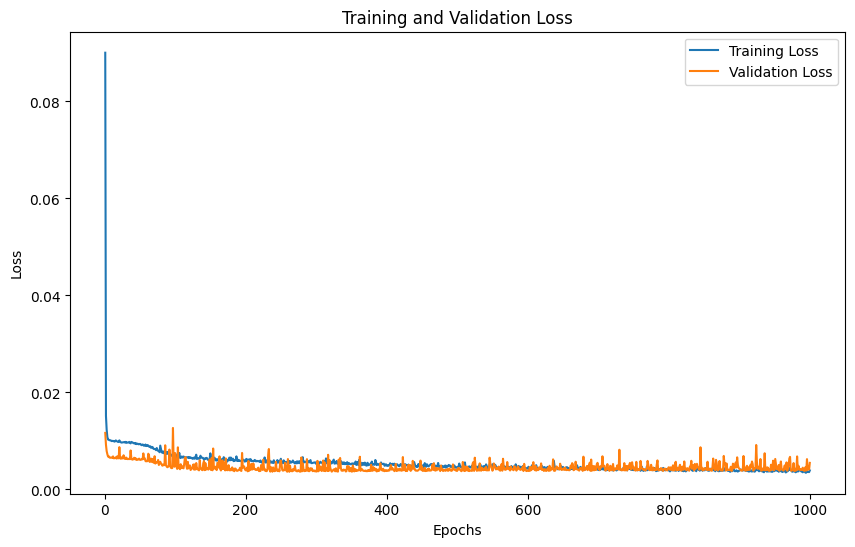

In [5]:
# 提取训练损失和验证损失
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 获取训练周期数
epochs = range(1, len(train_loss) + 1)

# 绘制训练损失和验证损失的曲线
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [6]:
# 对测试集进行预测
y_pred_scaled = LSTM_GRU_model.predict(X_test_reshaped)
# 使用相同的 scaler_y 实例来反归一化预测值
y_pred = scaler_y.inverse_transform(y_pred_scaled)

23/23 [==============================] - 0s 1ms/step


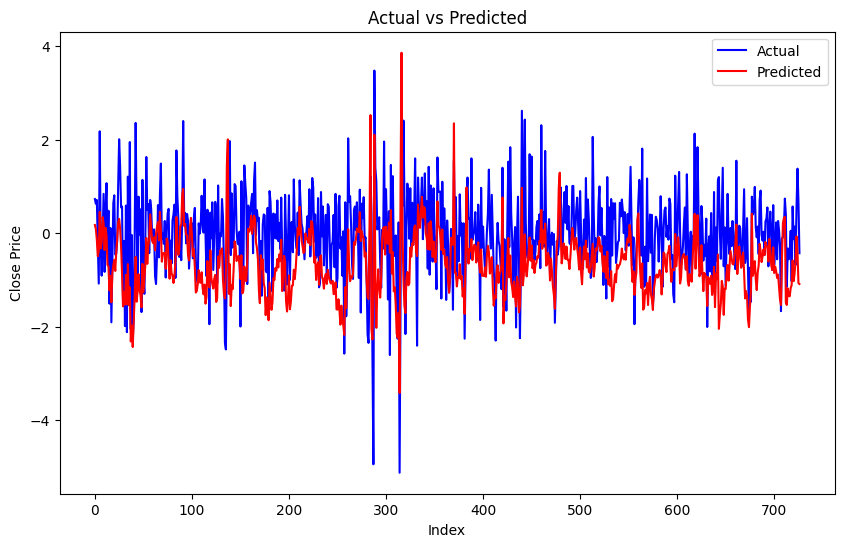

In [7]:
# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [8]:
# 检查 y_test 和 y_pred 的维度
print("y_test 维度:", y_test.ndim)
print("y_pred 维度:", y_pred.ndim)

y_test 维度: 2
y_pred 维度: 2


In [9]:
y_test
y_pred

array([[ 1.73438296e-01],
       [ 9.09257680e-02],
       [-1.37405947e-01],
       [-4.95014608e-01],
       [-3.85059059e-01],
       [ 4.54987884e-01],
       [-3.28076780e-01],
       [-1.93841234e-01],
       [ 3.42460454e-01],
       [ 2.04379007e-01],
       [-3.63561600e-01],
       [ 1.13033071e-01],
       [-4.99552116e-02],
       [-6.79955602e-01],
       [-7.15739369e-01],
       [-1.22542369e+00],
       [-9.17046010e-01],
       [-1.48123884e+00],
       [-8.54605675e-01],
       [-6.87554002e-01],
       [-5.71598530e-01],
       [-8.09492409e-01],
       [-4.10777867e-01],
       [-1.28647283e-01],
       [ 2.32394502e-01],
       [ 3.06598514e-01],
       [ 9.38187093e-02],
       [-2.87003130e-01],
       [-8.82320464e-01],
       [-1.56931174e+00],
       [-1.26479352e+00],
       [-1.53053856e+00],
       [-8.94519985e-01],
       [-1.52724135e+00],
       [-6.63272321e-01],
       [-1.54344213e+00],
       [-1.16063917e+00],
       [-2.31970930e+00],
       [-1.9

In [10]:
# 将二维数组展平为一维数组，然后创建 DataFrame
df2 = pd.DataFrame({'Actual': y_test[:, 0], 'Predicted': y_pred[:, 0]})

# 计算新列，即相减结果
df2['Difference'] = df2['Actual'] - df2['Predicted']

# 将 DataFrame 保存为 CSV 文件
df2.to_csv('LSTM-GRU_output.csv', index=False)

In [11]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mean_bias_error(y_true, y_pred):
    return np.mean(y_pred - y_true)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

def mean_squared_logarithmic_error(y_true, y_pred):
    y_true_log = np.log1p(np.maximum(0, y_true))
    y_pred_log = np.log1p(np.maximum(0, y_pred))
    return np.mean((y_true_log - y_pred_log)**2)

def root_mean_squared_logarithmic_error(y_true, y_pred):
    return np.sqrt(mean_squared_logarithmic_error(y_true, y_pred))

def normalized_root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / (np.max(y_true) - np.min(y_true)))**2))


# 将损失函数结果保存到CSV文件
def save_to_csv(loss_results):
    with open('LSTM_GRU_loss.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Loss Function", "Value"])
        for loss_name, loss_value in loss_results.items():
            writer.writerow([loss_name, loss_value])

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mbe = mean_bias_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
msle = mean_squared_logarithmic_error(y_test, y_pred)
rmsle = root_mean_squared_logarithmic_error(y_test, y_pred)
nrmse = normalized_root_mean_squared_error(y_test, y_pred)

loss_results = {
    "MAE": mae,
    "MSE": mse,
    "MBE": mbe,
    "RMSE": rmse,
    "MSLE": msle,
    "RMSLE": rmsle,
    "NRMSE": nrmse,
}
with open('LSTM_GRU_loss.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Loss Function", "Value"])
    for loss_name, loss_value in loss_results.items():
        writer.writerow([loss_name, loss_value])
        
save_to_csv(loss_results)

print("MAE:", mae)
print("MSE:", mse)
print("MBE:", mbe)
print("RMSE:", rmse)
print("MSLE:", msle)
print("RMSLE:", rmsle)
print("NRMSE:", nrmse)

MAE: 0.8209512139882692
MSE: 1.0446548436269767
MBE: -0.6336398948657556
RMSE: 1.0220835795701724
MSLE: 0.12292962637137475
RMSLE: 0.3506132147700294
NRMSE: 0.11870889425902119
